# Employee Attrition Prediction

## First Notebook: data transformation, feature engineering, and EDA (Time Dimension)

This project aims to better understand and predict employee attrition by incorporating behavioral dimensions alongside traditional demographic and job-related variables. It relies on the IBM HR Analytics Employee Attrition & Performance dataset, which contains detailed information on thousands of employees, including personal characteristics, job roles, survey responses, managerial evaluations, and attendance records.

The dataset combines static features (e.g., age, department, job level, tenure) with dynamic behavioral data (e.g., clock-in/clock-out times and absenteeism patterns). The final target variable is Attrition, indicating whether an employee has left the organization. Particular attention is given to the aggregation and transformation of time-based features to ensure interpretability and prevent data leakage.

The overall objective is to build a predictive model estimating the probability of employee attrition. This first notebook focuses on preparing and transforming the time-based subset of the data, performing full feature engineering and exploratory data analysis exclusively on attendance patterns. These time-derived features will later serve as a foundation for behavioral clustering and as inputs for further analysis or modeling.

**Author:** J-F Jutras  
**Date:** January 2026  
**Dataset:** HR Analytics Case Study — Kaggle


## 1.1-Data Loading

In [41]:
import kagglehub
import pandas as pd
import os
import pickle

#Download latest version
path = kagglehub.dataset_download("vjchoudhary7/hr-analytics-case-study")

#Define dataset path
dataset_dir = "/kaggle/input/hr-analytics-case-study"

#Load datasets
employee_csv = os.path.join(dataset_dir, "employee_survey_data.csv")
df_employee = pd.read_csv(employee_csv)

general_csv = os.path.join(dataset_dir, "general_data.csv")
df_general = pd.read_csv(general_csv)

intime_csv = os.path.join(dataset_dir, "in_time.csv")
df_intime = pd.read_csv(intime_csv)

manager_csv = os.path.join(dataset_dir, "manager_survey_data.csv")
df_manager = pd.read_csv(manager_csv)

outtime_csv = os.path.join(dataset_dir, "out_time.csv")
df_outtime = pd.read_csv(outtime_csv)

#Load other dataset from Kaggle input
final_dataset_path = "/kaggle/input/employeeattritiondataset/final_integrated_hr_dataset.pkl"
with open(final_dataset_path, "rb") as f:
    df = pickle.load(f)

#Clone the public GitHub repository "jfj-utils" into the current Kaggle working directory.
#This downloads all files and folders from the repo so they can be used in the notebook.
!rm -rf /kaggle/working/jfj-utils
!git clone https://github.com/jfjutras07/jfj-utils.git

#Add the cloned repository to the Python path so Python can import modules from it
import sys
sys.path.append("/kaggle/working/jfj-utils")

Cloning into 'jfj-utils'...
remote: Enumerating objects: 3431, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 3431 (delta 172), reused 99 (delta 99), pack-reused 3240 (from 4)
Receiving objects: 100% (3431/3431), 1.14 MiB | 14.36 MiB/s, done.
Resolving deltas: 100% (2263/2263), done.


## 1.2 Data Overview

### In Time

In [42]:
df_intime.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [43]:
from ingestion.readers import check_data
check_data(df_intime)


Columns: ['Unnamed: 0', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16', '2015-01-19', '2015-01-20', '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-26', '2015-01-27', '2015-01-28', '2015-01-29', '2015-01-30', '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05', '2015-02-06', '2015-02-09', '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13', '2015-02-16', '2015-02-17', '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-23', '2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27', '2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13', '2015-03-16', '2015-03-17', '2015-03-18', '2015-03-19', '2015-03-20', '2015-03-23', '2015-03-24', '2015-03-25', '2015-03-26', '2015-03-27', '2015-03-30', '2015-03-31', '2015-04-01', '2015-04-02', '2015-04-03', '2015-04-06', '2015-04-07', '2015-04-

### Out Time

In [44]:
df_outtime.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [45]:
check_data(df_outtime)


Columns: ['Unnamed: 0', '2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16', '2015-01-19', '2015-01-20', '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-26', '2015-01-27', '2015-01-28', '2015-01-29', '2015-01-30', '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05', '2015-02-06', '2015-02-09', '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13', '2015-02-16', '2015-02-17', '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-23', '2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27', '2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13', '2015-03-16', '2015-03-17', '2015-03-18', '2015-03-19', '2015-03-20', '2015-03-23', '2015-03-24', '2015-03-25', '2015-03-26', '2015-03-27', '2015-03-30', '2015-03-31', '2015-04-01', '2015-04-02', '2015-04-03', '2015-04-06', '2015-04-07', '2015-04-

The In Time and Out Time datasets each contain 4,410 entries with daily timestamp records spanning the full year of 2015 (262 columns including the employee identifier).

The data are high-dimensional, dominated by timestamp variables, with substantial missing values on non-working days (e.g., weekends and holidays) and no apparent duplicate records.

## 1.3 Data Cleaning and Transformation

**Data Cleaning and Preparation Roadmap**

| Step | Phase | Objective | Actions | Output |
|:---:|:---:|:---:|:---:|:---:|
| 1 | Data Integrity and Structure | Standardize identifiers and columns | Remove hidden duplicates; rename `Unnamed: 0` to `EmployeeID`; check uniqueness; align date columns between In/Out | Clean column names and consistent schema |
| 2 | Data Types | Ensure correct temporal typing | Convert In/Out columns to `datetime` | Fully typed time-series data |
| 3 | Reshaping & Merging | Normalize data structure | Melt In/Out into long format; merge on `(EmployeeID, Date)` | Single event-level DataFrame with `EmployeeID,  Date, InTime, OutTime` |
| 4 | Non-Working Days | Identify global missing days | Compute % missing per date; flag dates with 100% missing values (weekends/holidays) | List of non-working days |
| 5 | Data Filtering | Remove non-working days | Drop fully missing dates from event-level DataFrame | Reduced, relevant time window |
| 6 | Partial Missingness | Detect clocking anomalies | Identify In-only / Out-only records per employee-day; flag anomalies | Anomaly flags and summary stats |
| 7 | Temporal Consistency | Validate chronological order | Check `InTime < OutTime`; detect negative or extreme durations | Validated time records |
| 8 | Feature Prep and Engineering | Compute and enrich base indicators | Calculate arrival time, departure time, worked hours, presence ratio | Clean behavioral indicators before structured EDA |

### Step 1 - Data Integrity and Structure

The original dataset shows 4410 entries, but these are "hidden" duplicates. While timestamps are unique, the core HR profiles (Age, Income, etc.) are repeated. We must filter the time logs to match only the unique validated employees. This prevents density bias during clustering (over-representing certain profiles) and data leakage during classification (same person in train and test sets)

In [79]:
#Rename employee identifier
#Converting the index column 'Unnamed: 0' into a joinable 'EmployeeID'
df_intime = df_intime.rename(columns = {"Unnamed: 0" : "EmployeeID"})
df_outtime = df_outtime.rename(columns = {"Unnamed: 0" : "EmployeeID"})

print("First column - In Time dataset : ", df_intime.columns[0])
print("First column - Out Time dataset : ", df_outtime.columns[0])

#Check uniqueness before filtering
assert df_intime["EmployeeID"].is_unique
assert df_outtime["EmployeeID"].is_unique

#Create a list of columns to check for duplicates (all except EmployeeID)
cols_to_check = [col for col in df.columns if col != 'EmployeeID']

#Drop duplicates
df_unique = df.drop_duplicates(subset=cols_to_check).copy()

#Extract the list from df_unique
valid_ids = df_unique['EmployeeID'].unique()

#Only keep logs for employees that were NOT identified as duplicates
df_intime = df_intime[df_intime['EmployeeID'].isin(valid_ids)].copy()
df_outtime = df_outtime[df_outtime['EmployeeID'].isin(valid_ids)].copy()

#Final verification and date alignment
in_dates = set(df_intime.columns) - {"EmployeeID"}
out_dates = set(df_outtime.columns) - {"EmployeeID"}
assert in_dates == out_dates, "Mismatch between In/Out date columns"
date_cols = sorted(list(in_dates))

print(f"Filter complete. New shape for time logs: {df_intime.shape}")

First column - In Time dataset :  EmployeeID
First column - Out Time dataset :  EmployeeID
Filter complete. New shape for time logs: (2888, 262)


### Step 2 - Data Types

In [47]:
#List of date columns (excluding EmployeeID)
date_cols = [col for col in df_intime.columns if col != "EmployeeID"]

#Convert InTime and Outtime columns to datetime
for col in date_cols:
    df_intime[col] = pd.to_datetime(df_intime[col], errors = 'coerce')
    df_outtime[col] = pd.to_datetime(df_outtime[col], errors = 'coerce')

### Step 3 - Reshaping and Merging

In [48]:
#Melt InTime from wide to long
df_in_long = df_intime.melt(id_vars = ["EmployeeID"],
                           value_vars = date_cols,
                           var_name = "Date",
                           value_name = "InTime")

#Melt OutTime from wide to long
df_out_long = df_outtime.melt(id_vars = ["EmployeeID"],
                             value_vars = date_cols,
                             var_name = "Date",
                             value_name = "OutTime")

#Merge InTime and OutTime on EmployeeID/Date
df_events = pd.merge(df_in_long,
                    df_out_long,
                    on = ["EmployeeID", "Date"],
                    how = "outer")

#Convert Date to datetime
df_events["Date"] = pd.to_datetime(df_events["Date"])

#Sort by EmployeeID and Date
df_events = df_events.sort_values(by = ["EmployeeID", "Date"]).reset_index(drop = True)

#Quick preview
df_events.head()

,EmployeeID,Date,InTime,OutTime
0,1,2015-01-01,NaT,NaT
1,1,2015-01-02,2015-01-02 09:43:45,2015-01-02 16:56:15
2,1,2015-01-05,2015-01-05 10:08:48,2015-01-05 17:20:11
3,1,2015-01-06,2015-01-06 09:54:26,2015-01-06 17:19:05
4,1,2015-01-07,2015-01-07 09:34:31,2015-01-07 16:34:55


### Step 4 - Non-Working Days

In [49]:
#Add Weekday column
df_events["Weekday"] = df_events["Date"].dt.day_name()

#Check for Saturdays and Sundays
weekend_days = df_events[df_events["Weekday"].isin(["Saturday", "Sunday"])]["Date"].drop_duplicates()
print("Weekend days in the dataset")
print(weekend_days.sort_values(), "\n")

#Identify dates where all InTime and OutTime are NaT
all_nat_dates = df_events.groupby("Date")[["InTime", "OutTime"]].apply(lambda x: x.isna().all().all())
non_working_dates = all_nat_dates[all_nat_dates].index
print("Dates with all NaT values (potential holidays/non-working days):")
print(non_working_dates)

Weekend days in the dataset
Series([], Name: Date, dtype: datetime64[ns]) 

Dates with all NaT values (potential holidays/non-working days):
DatetimeIndex(['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-05',
               '2015-05-01', '2015-07-17', '2015-09-17', '2015-10-02',
               '2015-11-09', '2015-11-10', '2015-11-11', '2015-12-25'],
              dtype='datetime64[ns]', name='Date', freq=None)


No weekend days appear in the dataset, though this could also reflect missing data (employees might still work on weekends without it being recorded). 

The “all NaT” dates don’t correspond to all standard holidays internationally. For the purpose of this analysis, we will treat these dates as non-working days and continue with the transformation of the dataset.

### Step 5 - Data Filtering (Remove Non-Working Days)

In [50]:
#List of non-working days (fully missing InTime & OutTime)
non_working_days = [
    pd.Timestamp(d) for d in [
        '2015-01-01', '2015-01-14', '2015-01-26', '2015-03-05',
        '2015-05-01', '2015-07-17', '2015-09-17', '2015-10-02',
        '2015-11-09', '2015-11-10', '2015-11-11', '2015-12-25'
    ]
]

#Filter out non-working days
df_events = df_events[~df_events["Date"].isin(non_working_days)].copy()

#Check remaining dates
print(f"Remaining unique dates: {df_events['Date'].nunique()}")

Remaining unique dates: 249


### Step 6 - Partial Missingness / Clocking Anomalies

In [51]:
#Create flags for anomalies
df_events["InOnly"] = df_events["InTime"].notna() & df_events["OutTime"].isna()
df_events["OutOnly"] = df_events["OutTime"].notna() & df_events["InTime"].isna()

#Summary of anomalies
anomaly_summary = df_events[["EmployeeID", "Date", "InOnly", "OutOnly"]].copy()
total_in_only = anomaly_summary["InOnly"].sum()
total_out_only = anomaly_summary["OutOnly"].sum()

print(f"Total In-only records: {total_in_only}")
print(f"Total Out-only records: {total_out_only}")

Total In-only records: 0
Total Out-only records: 0


### Step 7 - Temporal Consistency

In [52]:
#Calculate worked duration in hours
df_events["WorkHours"] = (df_events["OutTime"] - df_events["InTime"]).dt.total_seconds() / 3600

#Flag negative or extreme durations (e.g., > 16 hours)
df_events["NegativeDuration"] = df_events["WorkHours"] < 0
df_events["ExtremeDuration"] = df_events["WorkHours"] > 16

#Summary
neg_count = df_events["NegativeDuration"].sum()
ext_count = df_events["ExtremeDuration"].sum()
print(f"Negative durations: {neg_count}")
print(f"Extreme durations (> 16h): {ext_count}")

#Review anomalies (temporal quality gate)
df_events_valid = df_events[~(df_events["NegativeDuration"] | df_events["ExtremeDuration"])].copy()

Negative durations: 0
Extreme durations (> 16h): 0


All data from InTime and OutTime have been merged into `df_events`, date columns are properly typed, non-working days have been removed, partial missingness has been checked (no In-only or Out-only anomalies), and temporal consistency has been validated with no negative or extreme durations. The dataset is now clean and ready for reshaping and feature engineering.

### Step 8 - Feature Preparation and Engineering

In [53]:
#Quick check before starting
df_events.head()

,EmployeeID,Date,InTime,OutTime,Weekday,InOnly,OutOnly,WorkHours,NegativeDuration,ExtremeDuration
1,1,2015-01-02,2015-01-02 09:43:45,2015-01-02 16:56:15,Friday,False,False,7.208333,False,False
2,1,2015-01-05,2015-01-05 10:08:48,2015-01-05 17:20:11,Monday,False,False,7.189722,False,False
3,1,2015-01-06,2015-01-06 09:54:26,2015-01-06 17:19:05,Tuesday,False,False,7.410833,False,False
4,1,2015-01-07,2015-01-07 09:34:31,2015-01-07 16:34:55,Wednesday,False,False,7.006667,False,False
5,1,2015-01-08,2015-01-08 09:51:09,2015-01-08 17:08:32,Thursday,False,False,7.289722,False,False


In [54]:
#The goal here is not to analyze absenteeism itself, but to verify that employees do not permanently
#disappear from the dataset during the year. By checking both total absences and the maximum number
#of consecutive absent days, we ensure that the observation window is complete for all employees and that
#no one exits the dataset before year-end.

#Sort data chronologically per employee
df_sorted = df_events.sort_values(["EmployeeID", "Date"]).copy()

#Boolean series: True if no work hours recorded (absence)
df_sorted["IsAbsent"] = df_sorted["WorkHours"].isna()

#Total number of absent days across the year
total_absences = (
    df_sorted
    .groupby("EmployeeID")["IsAbsent"]
    .sum()
    .rename("TotalAbsences")
)

#Maximum number of consecutive absent days (used to detect potential
#permanent drop-out patterns rather than regular leave)
df_sorted["AbsenceBlock"] = (
    df_sorted["IsAbsent"]
    .ne(df_sorted.groupby("EmployeeID")["IsAbsent"].shift())
    .groupby(df_sorted["EmployeeID"])
    .cumsum()
)

max_consecutive_absences = (
    df_sorted[df_sorted["IsAbsent"]]
    .groupby(["EmployeeID", "AbsenceBlock"])
    .size()
    .groupby("EmployeeID")
    .max()
    .rename("MaxConsecutiveAbsences")
)

#Compute absence diagnostics per employee
absence_summary = (
    pd.concat([total_absences, max_consecutive_absences], axis=1)
    .fillna(0)
    .reset_index()
    .sort_values("TotalAbsences", ascending = False)
)

#Quick preview
absence_summary.head(10)


,EmployeeID,TotalAbsences,MaxConsecutiveAbsences
1506,1552,24,2
1969,2359,24,2
1639,1759,24,2
740,741,24,1
1818,2071,24,3
2277,2881,24,2
2526,3491,23,2
194,195,23,2
2850,4302,23,2
968,969,23,2


This check is performed to ensure that missing workdays correspond to regular absences rather than permanent drop-outs. The low maximum number of consecutive absences (≤ 3 days) confirms that all employees are fully observed across the entire year.

In [55]:
#We are checking the latest arrival time across all employees to determine if there are any late
#or night shifts. 

# Extract arrival hours in decimal format
df_events["ArrivalHour"] = df_events["InTime"].dt.hour + df_events["InTime"].dt.minute / 60

# Find latest arrival
latest_arrival = df_events["ArrivalHour"].max()

print(f"Latest arrival: {latest_arrival:.2f} h")

Latest arrival: 11.32 h


Since the latest arrival is 11.32 h (around 11:20 AM), we can confirm that all employees follow 'day' shifts, which allows us to safely compute work hours and attendance features assuming a standard daytime schedule.

**Daily Attendance Indicators**

In [56]:
#Create time-based features
df_events['Month'] = df_events['Date'].dt.month
df_events['Week'] = df_events['Date'].dt.isocalendar().week.astype(int)

#Identify absences
#If WorkHours is null, the employee was absent for that business day
if 'Absent' not in df_events.columns:
    df_events['Absent'] = df_events['WorkHours'].isna()

#Calculate arrival and departure hours in decimal format
df_events["ArrivalHour"] = df_events["InTime"].dt.hour + df_events["InTime"].dt.minute / 60
df_events["DepartureHour"] = df_events["OutTime"].dt.hour + df_events["OutTime"].dt.minute / 60

#Define a standard workday (8 hours from df_general['StandardHours']) to calculate deviations
#WorkDelta: positive means overtime, negative means deficit
df_events["WorkDelta"] = df_events["WorkHours"] - 8

#Identify worked days (to avoid tagging NaT/Absences as 'Short Days')
is_worked = df_events["WorkHours"].notna()

#Flags for behavioral analysis (Boolean)
#Fixed thresholds isolate standard workdays from anomalies (partial days)
#to ensure the baseline remains independent of the group's average behavior.
df_events["ShortDay"] = (df_events["WorkHours"] < 7) & is_worked
df_events["LongDay"] = (df_events["WorkHours"] > 9) & is_worked

#Quantitative indicators (Hours)
#Overtime: hours worked beyond 9h (threshold-based)
df_events["DailyOvertime"] = df_events["WorkDelta"].apply(lambda x: x if x > 1 else 0)
#Deficit: hours missing to reach at least 7h
df_events["DailyDeficit"] = df_events["WorkDelta"].apply(lambda x: abs(x) if x < -1 else 0)

#Define the logical order of groups
id_cal_cols = ['EmployeeID', 'Date','Month', 'Week', 'Weekday']
raw_time_cols = ['InTime', 'OutTime', 'ArrivalHour', 'DepartureHour']
work_metrics_cols = ['WorkHours', 'WorkDelta', 'DailyOvertime', 'DailyDeficit']
risk_flags_cols = ['Absent', 'ShortDay', 'LongDay']
audit_cols = ['InOnly', 'OutOnly', 'NegativeDuration', 'ExtremeDuration']

#Reconstruct the DataFrame
df_events = df_events[id_cal_cols + raw_time_cols + work_metrics_cols + risk_flags_cols + audit_cols]

#Display results
df_events.head()

,EmployeeID,Date,Month,Week,Weekday,InTime,OutTime,ArrivalHour,DepartureHour,WorkHours,WorkDelta,DailyOvertime,DailyDeficit,Absent,ShortDay,LongDay,InOnly,OutOnly,NegativeDuration,ExtremeDuration
1,1,2015-01-02,1,1,Friday,2015-01-02 09:43:45,2015-01-02 16:56:15,9.716667,16.933333,7.208333,-0.791667,0.0,0.0,False,False,False,False,False,False,False
2,1,2015-01-05,1,2,Monday,2015-01-05 10:08:48,2015-01-05 17:20:11,10.133333,17.333333,7.189722,-0.810278,0.0,0.0,False,False,False,False,False,False,False
3,1,2015-01-06,1,2,Tuesday,2015-01-06 09:54:26,2015-01-06 17:19:05,9.900000,17.316667,7.410833,-0.589167,0.0,0.0,False,False,False,False,False,False,False
4,1,2015-01-07,1,2,Wednesday,2015-01-07 09:34:31,2015-01-07 16:34:55,9.566667,16.566667,7.006667,-0.993333,0.0,0.0,False,False,False,False,False,False,False
5,1,2015-01-08,1,2,Thursday,2015-01-08 09:51:09,2015-01-08 17:08:32,9.850000,17.133333,7.289722,-0.710278,0.0,0.0,False,False,False,False,False,False,False


**Weekly Attendance Indicators**

In [57]:
#Identify the actual number of business days available each week
business_days_per_week = df_events.groupby('Week')['Date'].nunique()

#Aggregate daily indicators by Employee and Week
df_weekly = df_events.groupby(['EmployeeID', 'Week']).agg(
    WeeklyWorkHours=('WorkHours', 'sum'),
    WeeklyOvertime=('DailyOvertime', 'sum'),
    WeeklyDeficit=('DailyDeficit', 'sum'),
    WeeklyShortDayCount=('ShortDay', 'sum'),
    WeeklyLongDayCount=('LongDay', 'sum'),
    WeeklyAbsences=('Absent', 'sum'),
    WeeklyArrivalStd=('ArrivalHour', 'std'),
    DaysWorked=('WorkHours', 'count')
).reset_index()

#Normalize metrics based on the business calendar
#Mapping the actual number of working days available for each week
df_weekly['BusinessDaysInWeek'] = df_weekly['Week'].map(business_days_per_week)

#Standardized average: reflects the daily pace when the employee is present
df_weekly['WeeklyAvgWorkHours'] = df_weekly['WeeklyWorkHours'] / df_weekly['DaysWorked']

#Weekly Engagement Score: total hours divided by available business days
#This highlights drops in productivity due to absences or short days
df_weekly['WeeklyEngagementScore'] = df_weekly['WeeklyWorkHours'] / df_weekly['BusinessDaysInWeek']

#Relative performance compared to peers
#Calculate the mean engagement score for all employees each week
peer_weekly_avg = df_weekly.groupby('Week')['WeeklyEngagementScore'].transform('mean')

#How much the employee worked vs. the company norm for that specific week
df_weekly['WeeklyHoursVsPeerAvg'] = df_weekly['WeeklyEngagementScore'] - peer_weekly_avg

#Define the logical order of groups
id_cols = ['EmployeeID', 'Week']
calendar_cols = ['BusinessDaysInWeek', 'DaysWorked']
volume_cols = ['WeeklyWorkHours', 'WeeklyAvgWorkHours', 'WeeklyEngagementScore']
peer_cols = ['WeeklyHoursVsPeerAvg']
behavior_cols = ['WeeklyAbsences', 'WeeklyDeficit', 'WeeklyShortDayCount', 'WeeklyLongDayCount', 'WeeklyArrivalStd']

#Reconstruct the DataFrame with organized columns
new_order = id_cols + calendar_cols + volume_cols + peer_cols + behavior_cols
df_weekly = df_weekly[new_order]

# Preview the results
df_weekly.head()

,EmployeeID,Week,BusinessDaysInWeek,DaysWorked,WeeklyWorkHours,WeeklyAvgWorkHours,WeeklyEngagementScore,WeeklyHoursVsPeerAvg,WeeklyAbsences,WeeklyDeficit,WeeklyShortDayCount,WeeklyLongDayCount,WeeklyArrivalStd
0,1,1,1,1,7.208333,7.208333,7.208333,0.111372,0,0.000000,0,0,NaN
1,1,2,5,5,36.381389,7.276278,7.276278,0.192267,0,0.000000,0,0,0.239037
2,1,3,4,4,29.708333,7.427083,7.427083,0.376040,0,0.000000,0,0,0.271953
3,1,4,5,4,28.526111,7.131528,5.705222,-1.358088,1,1.224167,1,0,0.214897
4,1,5,4,4,29.011389,7.252847,7.252847,0.174808,0,1.150278,1,0,0.139443


**Monthly Attendance Indicators**

In [58]:
#Aggregate data by Employee and Month
df_monthly = df_events.groupby(['EmployeeID', 'Month']).agg(
    MonthlyWorkHours=('WorkHours', 'sum'),
    MonthlyAbsences=('Absent', 'sum'),
    MonthlyShortDays=('ShortDay', 'sum'),
    MonthlyLongDays=('LongDay', 'sum'),
    MonthlyArrivalStd=('ArrivalHour', 'std'), 
    DaysWorked=('WorkHours', 'count')
).reset_index()

#Normalize and create long-term trends
#Monthly average to compare months of different lengths
df_monthly['MonthlyDailyAvg'] = df_monthly['MonthlyWorkHours'] / df_monthly['DaysWorked']

#Peer Comparison at Monthly Level
#This identifies if someone is consistently below the company norm for a whole month
monthly_peer_avg = df_monthly.groupby('Month')['MonthlyDailyAvg'].transform('mean')
df_monthly['MonthlyVsPeerAvg'] = df_monthly['MonthlyDailyAvg'] - monthly_peer_avg

#Define the logical order of groups
organized_columns = [
    'EmployeeID', 'Month', 'DaysWorked',                    
    'MonthlyWorkHours', 'MonthlyDailyAvg',                  
    'MonthlyVsPeerAvg',                                     
    'MonthlyAbsences', 'MonthlyShortDays', 'MonthlyLongDays', 
    'MonthlyArrivalStd'                                     
]

df_monthly = df_monthly[organized_columns]

#Preview the monthly dynamics
df_monthly.head()

,EmployeeID,Month,DaysWorked,MonthlyWorkHours,MonthlyDailyAvg,MonthlyVsPeerAvg,MonthlyAbsences,MonthlyShortDays,MonthlyLongDays,MonthlyArrivalStd
0,1,1,18,130.835556,7.268642,-0.201191,1,2,0,0.236634
1,1,2,19,140.977778,7.419883,-0.053615,1,1,0,0.284965
2,1,3,19,139.573889,7.345994,-0.126722,2,3,0,0.268067
3,1,4,22,163.631944,7.437816,-0.033957,0,1,0,0.219604
4,1,5,17,125.864444,7.403791,-0.068731,3,1,0,0.220252


## 1.4-EDA (Time Dimension)

**Exploratory Data Analysis - Roadmap**

| Analysis Level | Focus Area | Key Metrics | Strategic Objective |
|---------------|-----------|-------------|---------------------|
| Univariate | Normative Profiling | WeeklyAvgWorkHours, WeeklyArrivalStd, TotalAbsences | Establish the **company baseline** and identify dominant norms vs. marginal behaviors. |
| Univariate | Extreme Behaviors | TotalShortDays, TotalLongDays | Measure the **concentration and asymmetry** of disengagement (Short Days) and over-presence (Long Days). |
| Bivariate | Seasonality & Cycles | Weekday & Month × (Absent, ShortDay, LongDay) | Separate **temporal regularities** from individual behavioral patterns. |
| Multivariate | Group-Level Temporal Dynamics | Absence, ShortDay, LongDay by Month × **Workload_Group / Instability_Group / Volatility_Group** | Compare **behavioral trajectories across groups** and identify which dimensions differentiate outcomes over time. |
| Multivariate | Work Pattern Polarization | ShortDay vs. LongDay × **Workload_Group** | Reveal **polarized engagement regimes** (disengagement vs. presenteeism) across workload intensity. |
| Multivariate | Engagement Trajectories | Absence Rate by Month × **Trend_Group** | Detect **diverging engagement paths** (Increasing / Stable / Declining) and their risk implications. |
| Multivariate | Pillar Interaction Structure | Distribution of **Workload, Volatility, Instability** across **Trend_Group** | Understand how **behavioral pillars combine** to produce sustained, improving, or declining engagement. |



### Univariate Analysis

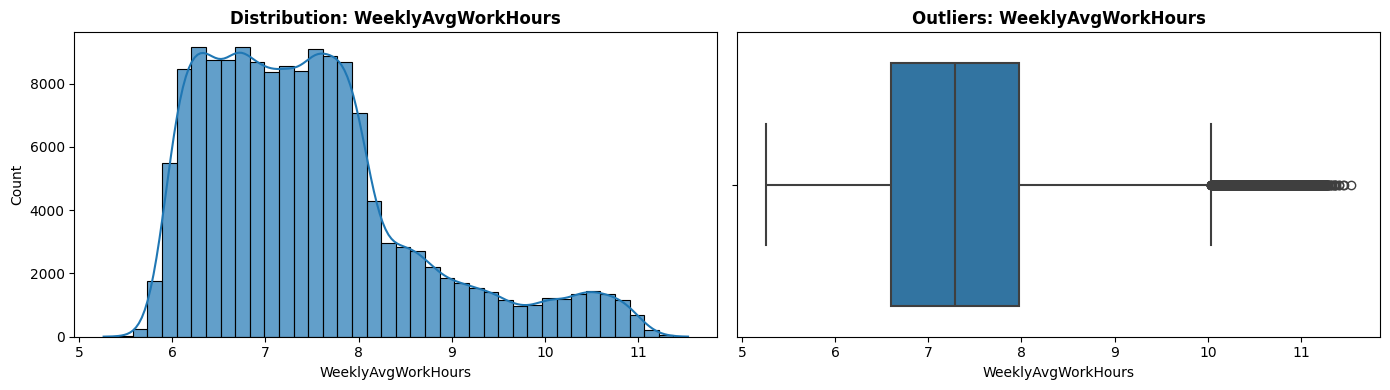

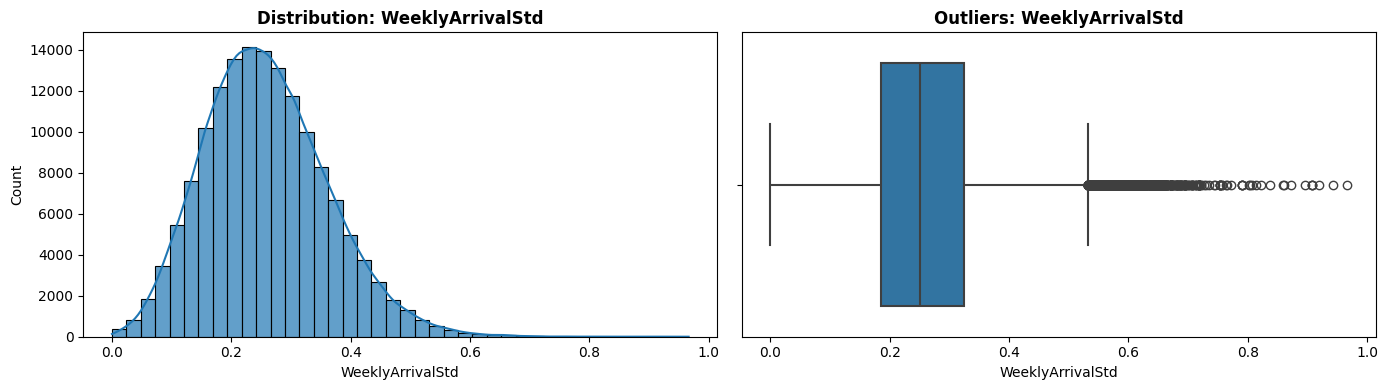

In [59]:
#Define columns to plot
norm_prof_cols = ['WeeklyAvgWorkHours', 'WeeklyArrivalStd']
from visualization.explore_continuous import plot_numeric_distribution
plot_numeric_distribution(df_weekly, norm_prof_cols)

Weekly work hours are tightly clustered around a clear organizational norm, with moderate variability and a limited high-end tail. This indicates a stable baseline for most employees, with a small subgroup exhibiting higher work intensity. Arrival times are generally consistent, as reflected by a low average arrival standard deviation, though a minority displays significant schedule irregularity.

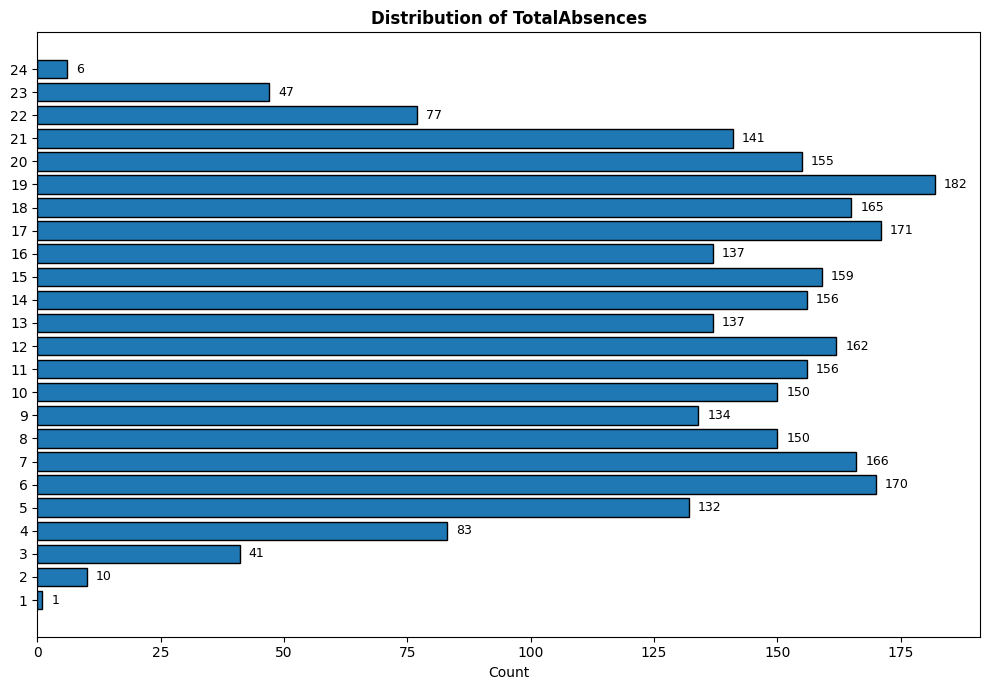

In [72]:
#Aggregate absences to an employee level
df_total_absences = df_events.groupby('EmployeeID').agg(TotalAbsences = ('Absent', 'sum')).reset_index()
from visualization.explore_discrete import plot_discrete_distribution
plot_discrete_distribution(df_total_absences, ['TotalAbsences'], figsize = (10, 7))

Absences are frequent and structurally present across the workforce. The distribution is centered around a moderate number of absences per individual, with limited dispersion, suggesting absenteeism is a recurring behavioral feature rather than driven by extreme outliers.

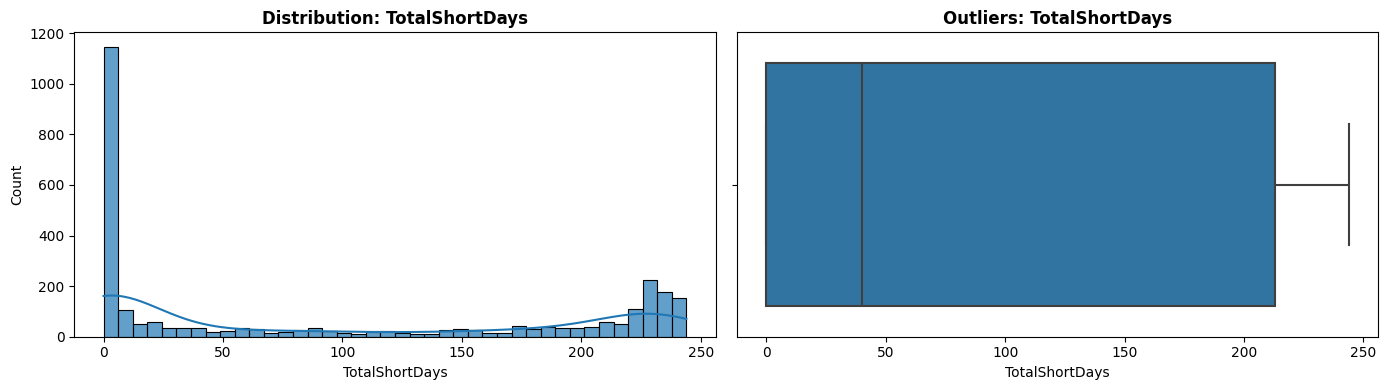

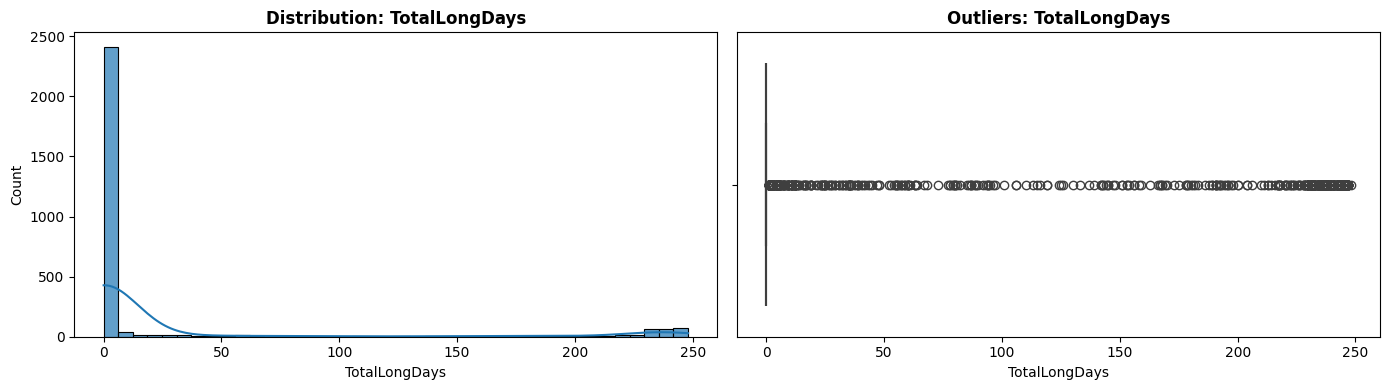

In [61]:
#Aggregate short and long days to an employee level
df_day_types = df_events.groupby('EmployeeID').agg(TotalShortDays = ('ShortDay', 'sum'),
                                                  TotalLongDays = ('LongDay', 'sum')).reset_index()
day_types_cols = ['TotalShortDays', 'TotalLongDays']
plot_numeric_distribution(df_day_types, day_types_cols)

Short working days show a highly skewed distribution: most employees record few or none, while a small subgroup accumulates a very large number, indicating concentrated disengagement patterns. In contrast, long working days are rare and exceptional (many outliers in the boxplot), with most employees never experiencing them, implying they are situational rather than systemic.

### Bivariate Analysis

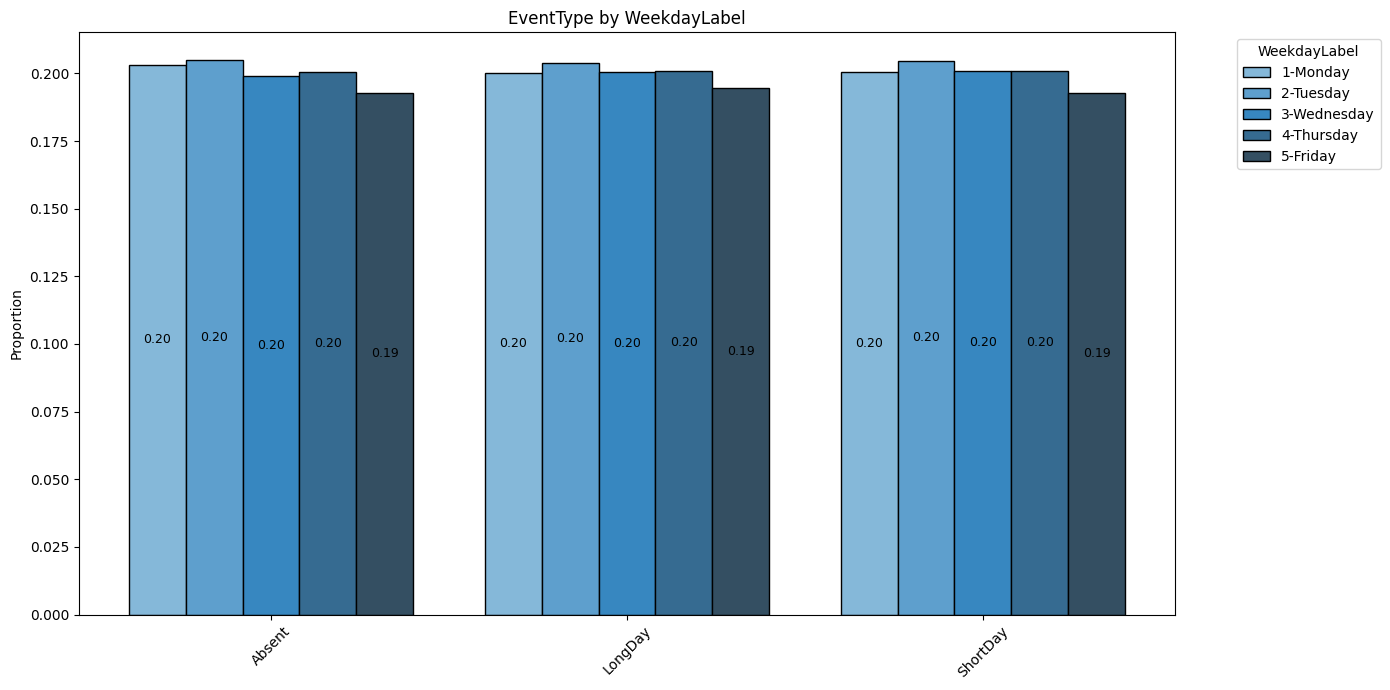

In [62]:
import seaborn as sns
from visualization.explore_discrete_multivariate import plot_discrete_bivariate_grid

#Mapping for chronological sorting
day_mapping = {
    'Monday': '1-Monday',
    'Tuesday': '2-Tuesday',
    'Wednesday': '3-Wednesday',
    'Thursday': '4-Thursday',
    'Friday': '5-Friday'
}

#Create a local copy for plotting
df_plot_weekly_full = df_events.copy()
df_plot_weekly_full['WeekdayLabel'] = df_plot_weekly_full['Weekday'].map(day_mapping)

#Melt to include all three event types: Absent, ShortDay, and LongDay
df_plot = df_plot_weekly_full.melt(
    id_vars=['WeekdayLabel'], 
    value_vars=['Absent', 'ShortDay', 'LongDay'],
    var_name='EventType', 
    value_name='IsEvent'
)

df_plot = df_plot[df_plot['IsEvent'] == 1].dropna(subset=['WeekdayLabel'])

#Palette Generation
weekday_colors = sns.color_palette("Blues_d", 5) 

#Full Weekly Bivariate Plotting
plot_discrete_bivariate_grid(
    df_plot, 
    'EventType', 
    hue_col='WeekdayLabel', 
    colors=weekday_colors, 
    figsize=(14, 7)
)

The results reveal a striking stability across the workweek, with each day accounting for almost exactly 20% of total weekly events. The distribution follows a consistent ~71/21/8 pattern (Short Days / Long Days / Absences) regardless of the day, with no observable 'Friday effect' in absenteeism, which actually peaks slightly on Tuesdays (20.49%). Overtime rates remain remarkably steady at ~21%, suggesting a habit-driven workload and a highly standardized operational pace rather than end-of-week pressure.

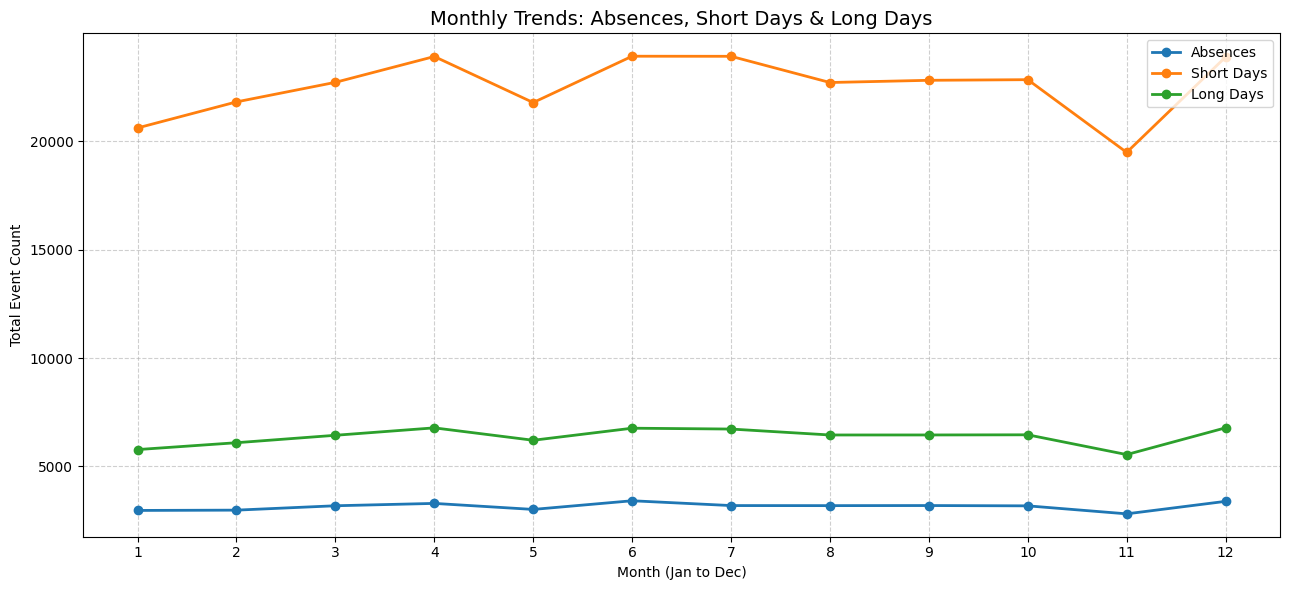

In [63]:
import matplotlib.pyplot as plt

#Aggregate sums by month
monthly_trends = df_events.groupby('Month')[['Absent', 'ShortDay', 'LongDay']].sum()

#Plotting the consolidated trends
plt.figure(figsize=(13, 6))

#Plotting each metric with distinct markers and labels
plt.plot(monthly_trends.index, monthly_trends['Absent'], marker='o', label='Absences', linewidth=2)
plt.plot(monthly_trends.index, monthly_trends['ShortDay'], marker='o', label='Short Days', linewidth=2)
plt.plot(monthly_trends.index, monthly_trends['LongDay'], marker='o', label='Long Days', linewidth=2)

#Display plot
plt.title('Monthly Trends: Absences, Short Days & Long Days', fontsize=14)
plt.xlabel('Month (Jan to Dec)')
plt.ylabel('Total Event Count')
plt.xticks(range(1, 13)) 
plt.legend(loc='upper right', frameon=True)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Monthly patterns confirm remarkably stable behavior ratios, consistently following a 70/20/10 rule (Short Days / Long Days / Absences) with minimal structural variation throughout the year. While event volumes show clear seasonality (peaking in late spring (May) and surging again in December after a November dip) the proportional distributions remain unchanged. 

This indicates that while the workload volume fluctuates, the operational habits remain highly predictable. Significant anomalies are therefore absent at the aggregate level, suggesting that behavioral insights for clustering should focus on individual-level variances.

### Multivariate Analysis

In this section, we move beyond univariate analysis to study the multidimensional behavior of employees. By combining workload intensity, schedule stability, effort volatility, and performance trends, we aim to identify behavioral archetypes. This approach allows us to detect complex patterns that remain hidden when metrics are analyzed in isolation.

**Workload Intensity Groups**

In [64]:
#Calculate the Annual Average Engagement Score per employee
df_workload = df_weekly.groupby('EmployeeID')['WeeklyEngagementScore'].mean().reset_index()
df_workload.columns = ['EmployeeID', 'Avg_Engagement_Score']

#Create 4 Workload Groups based on quartiles
#Q1: Light, Q2-Q3: Standard, Q4: Heavy
df_workload['Workload_Group'] = pd.qcut(
    df_workload['Avg_Engagement_Score'], 
    q=4, 
    labels=['Light', 'Standard', 'Heavy', 'Very Heavy']
)

#Quick check
print(df_workload.head())

   EmployeeID  Avg_Engagement_Score Workload_Group
0           1              6.897084          Heavy
1           2              7.324551          Heavy
2           3              6.827727       Standard
3           4              6.801734       Standard
4           5              7.887251     Very Heavy


**Behavioral Stability Groups**

In [65]:
#Calculate Departure Std (from daily events)
df_departure_std = df_events.groupby('EmployeeID')['DepartureHour'].std().reset_index()
df_departure_std.columns = ['EmployeeID', 'Departure_Std']

#Get Average Arrival Std (from weekly aggregation)
df_arrival_std = df_weekly.groupby('EmployeeID')['WeeklyArrivalStd'].mean().reset_index()
df_arrival_std.columns = ['EmployeeID', 'Arrival_Std']

#Merge and create the Combined Instability Index
df_instability = pd.merge(df_arrival_std, df_departure_std, on='EmployeeID')
df_instability['Combined_Instability'] = (df_instability['Arrival_Std'] + df_instability['Departure_Std']) / 2

#Create 4 groups based on quartiles (Categorical grouping)
# Q1: Stable, Q2-Q3: Moderate, Q4: Highly Unstable
df_instability['Instability_Group'] = pd.qcut(
    df_instability['Combined_Instability'], 
    q=4, 
    labels=['Low', 'Medium', 'High', 'Very High']
)

print(df_instability.head())

   EmployeeID  Arrival_Std  Departure_Std  Combined_Instability  \
0           1     0.232516       0.373791              0.303153   
1           2     0.281431       0.418810              0.350120   
2           3     0.251158       0.395190              0.323174   
3           4     0.258649       0.407105              0.332877   
4           5     0.252671       0.405745              0.329208   

  Instability_Group  
0               Low  
1         Very High  
2               Low  
3            Medium  
4            Medium  


In [66]:
#Calculate the volatility (std) of the WeeklyEngagementScore for each employee
df_volatility = df_weekly.groupby('EmployeeID')['WeeklyEngagementScore'].std().reset_index()
df_volatility.columns = ['EmployeeID', 'Engagement_Volatility']

#Create 4 groups based on quartiles
#Low Volatility = Steady pace, High Volatility = Erratic pace
df_volatility['Volatility_Group'] = pd.qcut(
    df_volatility['Engagement_Volatility'], 
    q=4, 
    labels=['Steady', 'Balanced', 'Fluctuating', 'Erratic']
)

print(df_volatility.head())


   EmployeeID  Engagement_Volatility Volatility_Group
0           1               0.952936          Erratic
1           2               0.735934         Balanced
2           3               0.497872           Steady
3           4               0.844091      Fluctuating
4           5               0.447079           Steady


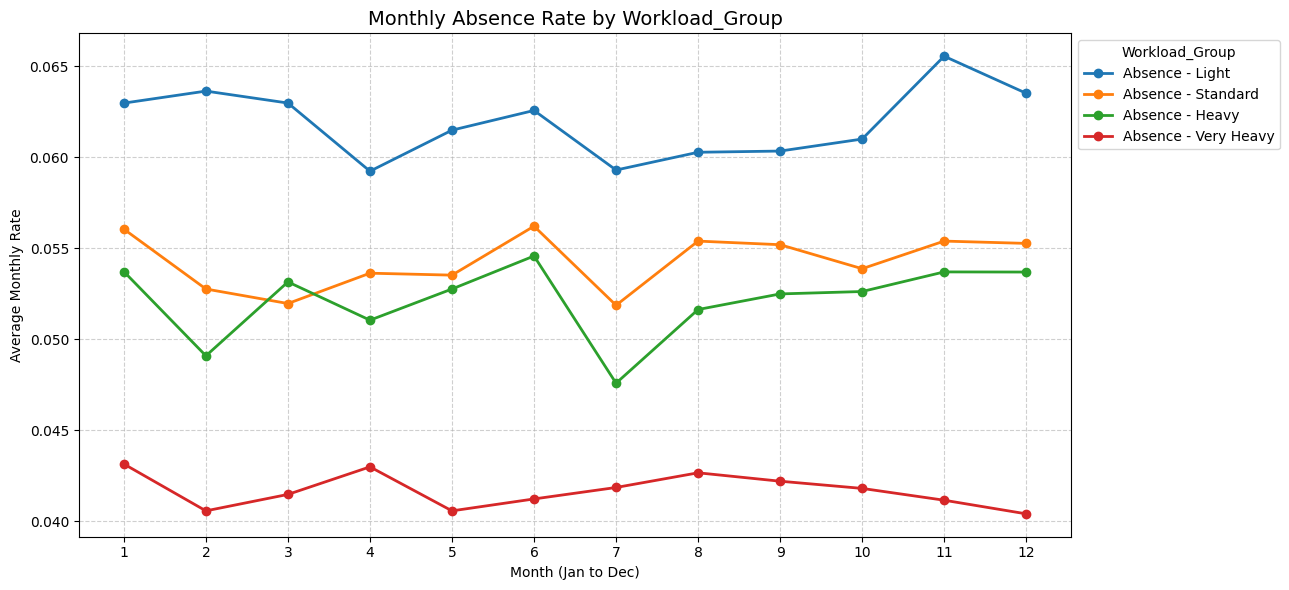

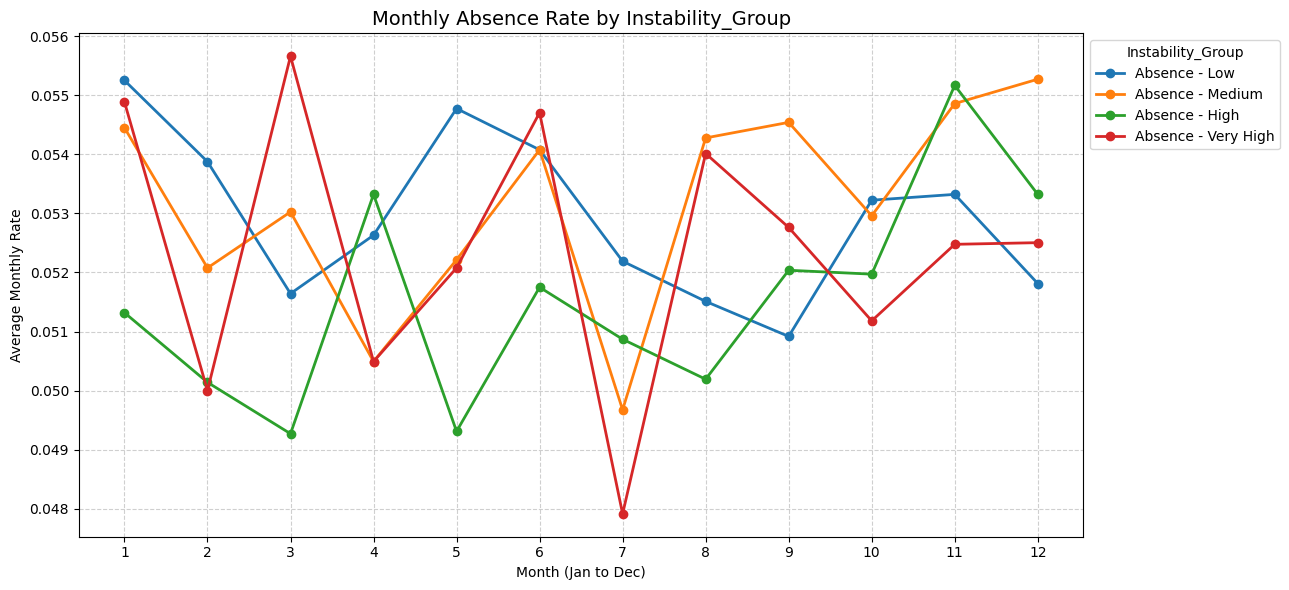

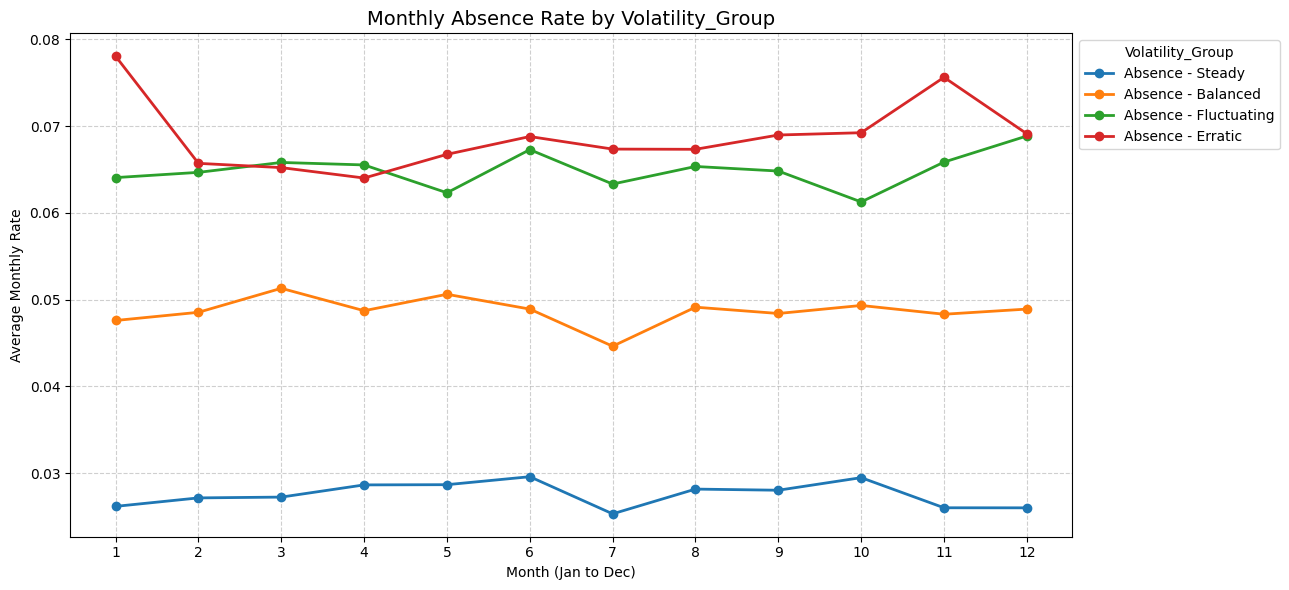

In [67]:
#This block consolidates all behavioral dimensions into a single employee-level mapping
df_mapping = (
    df_workload[['EmployeeID', 'Workload_Group']]
    .merge(df_instability[['EmployeeID', 'Instability_Group']], on='EmployeeID')
    .merge(df_volatility[['EmployeeID', 'Volatility_Group']], on='EmployeeID')
)

#Merge metrics with behavioral groups
# We extract necessary columns from df_events and join them with our behavioral mapping
df_metrics = df_events[['EmployeeID', 'Month', 'Absent', 'ShortDay', 'LongDay']].copy()
df_viz = pd.merge(df_metrics, df_mapping, on='EmployeeID')

#List of pillars to analyze
pillars = ['Workload_Group', 'Instability_Group', 'Volatility_Group']

for pillar in pillars:
    # Aggregate by Month and the selected Pillar
    # Using mean() ensures groups are comparable regardless of the number of employees in each
    monthly_trends = df_viz.groupby(['Month', pillar])[['Absent', 'ShortDay', 'LongDay']].mean().reset_index()
    
    plt.figure(figsize=(13, 6))
    
    #Loop through each category within the pillar
    #We plot the 'Absent' rate for each category to identify behavioral patterns
    for category in monthly_trends[pillar].unique():
        subset = monthly_trends[monthly_trends[pillar] == category]
        plt.plot(
            subset['Month'], 
            subset['Absent'], 
            marker='o', 
            label=f'Absence - {category}', 
            linewidth=2
        )

    #Plot formatting
    plt.title(f'Monthly Absence Rate by {pillar}', fontsize=14)
    plt.xlabel('Month (Jan to Dec)')
    plt.ylabel('Average Monthly Rate')
    plt.xticks(range(1, 13)) 
    plt.legend(title=pillar, loc='upper left', frameon=True, bbox_to_anchor=(1, 1))
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

Volatility is the dominant behavioral predictor of absenteeism. Absence rates increase from 2.6% among steady employees to 7.8% in the erratic group, a threefold rise and a maximum Behavioral Gap of 5.19%. This confirms that erratic engagement reflects underlying instability rather than a simple work style, making volatility the most critical variable for identifying high-risk profiles in predictive models.

Workload displays an inverse and paradoxical relationship with attendance. Light workload employees show the highest absence rates (6.2%), signaling disengagement. Conversely, the Very Heavy group records the lowest rate (4.1%), but this sustained presence may mask extreme presenteeism, increasing exposure to sudden burnout-driven exits.

Schedule instability, in contrast, is not a meaningful predictor. Absence rates remain flat around 5.1% across all groups, with only a 0.6% gap. Unlike volatility, instability acts as statistical noise rather than a reliable behavioral risk signal.

In [68]:
#Summary : short days vs long days by workload group
workload_comparison = df_viz.groupby('Workload_Group')[['ShortDay', 'LongDay']].mean()

#Formatting as percentages for interpretation
workload_comparison_pct = (workload_comparison * 100).round(2)

#Display results
display(workload_comparison_pct.astype(str) + '%')

,ShortDay,LongDay
Workload_Group,,
Light,91.34%,0.0%
Standard,53.9%,0.0%
Heavy,5.21%,0.01%
Very Heavy,0.02%,42.49%


This distribution highlights a clear polarization of work patterns across workload groups. The Light workload group is overwhelmingly composed of short workdays (91.34%), reinforcing its profile of low engagement. As workload increases, the share of short days drops sharply, reaching almost zero in the Very Heavy group. In contrast, long workdays are almost exclusive to the Very Heavy group (42,49%), suggesting a strong presence culture that may reflect high commitment but also raises concerns about sustained pressure and potential presenteeism.

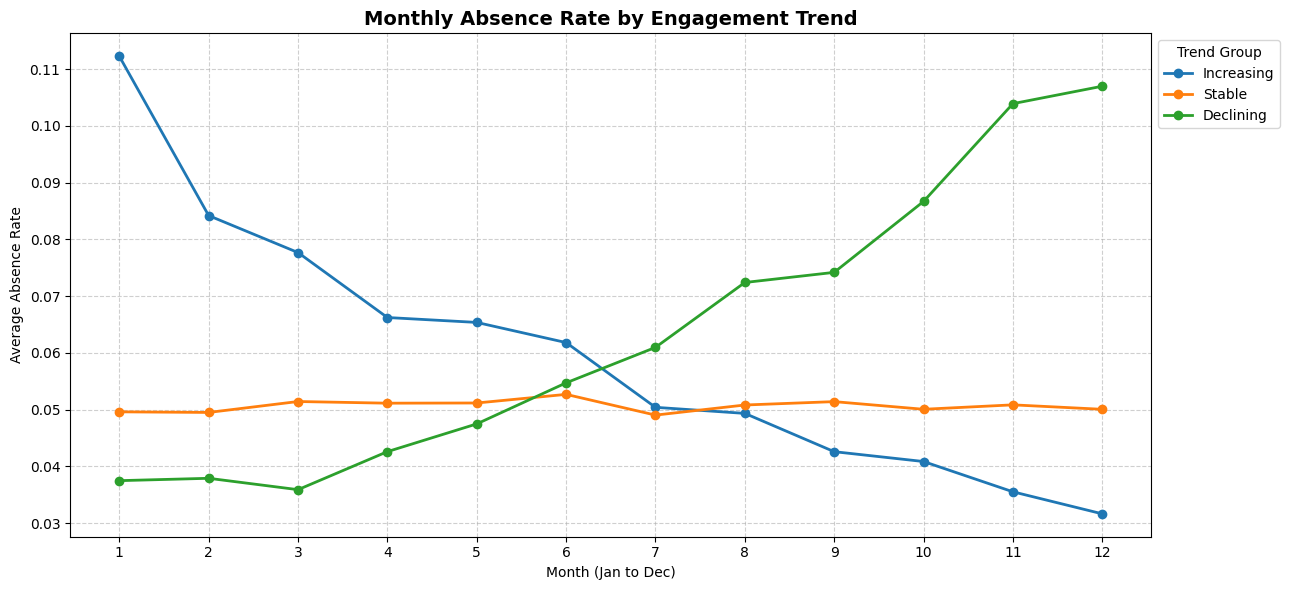

In [76]:
import numpy as np
from scipy.stats import linregress

#Compute Trend Group
def calculate_slope(series):
    #Regression to find the trend of engagement over weeks
    y = series.values
    x = np.arange(len(y))
    #We only need the slope (first return value)
    slope, _, _, _, _ = linregress(x, y)
    return slope

#Calculate slope per employee and categorize immediately
df_trend = df_weekly.groupby('EmployeeID')['WeeklyEngagementScore'].apply(calculate_slope).reset_index()
df_trend.columns = ['EmployeeID', 'Engagement_Slope']

#Thresholds: below -0.01 (Declining), above 0.01 (Increasing), else Stable
df_trend['Trend_Group'] = df_trend['Engagement_Slope'].apply(
    lambda x: 'Declining' if x < -0.01 else ('Increasing' if x > 0.01 else 'Stable')
)

#Build Final Mapping (The 4 Pillars)
#Merging Workload, Instability, Volatility and the new Trend
df_mapping = df_workload[['EmployeeID', 'Workload_Group']].merge(
    df_instability[['EmployeeID', 'Instability_Group']], on='EmployeeID'
).merge(
    df_volatility[['EmployeeID', 'Volatility_Group']], on='EmployeeID'
).merge(
    df_trend[['EmployeeID', 'Trend_Group']], on='EmployeeID'
)

#Merge back to daily metrics for visualization
df_viz = pd.merge(df_metrics, df_mapping, on='EmployeeID')

#Visualization: Absence Rate by Trend
monthly_trend_viz = df_viz.groupby(['Month', 'Trend_Group'])['Absent'].mean().reset_index()

plt.figure(figsize=(13, 6))
#Define consistent order for the legend
order = ['Increasing', 'Stable', 'Declining']
for category in [c for c in order if c in monthly_trend_viz['Trend_Group'].unique()]:
    subset = monthly_trend_viz[monthly_trend_viz['Trend_Group'] == category]
    plt.plot(subset['Month'], subset['Absent'], marker='o', label=category, linewidth=2)

plt.title('Monthly Absence Rate by Engagement Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month (Jan to Dec)')
plt.ylabel('Average Absence Rate')
plt.xticks(range(1, 13))
plt.legend(title='Trend Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Trend analysis highlights two opposing engagement trajectories with clear implications for absenteeism. The Declining group starts the year with low absence rates (~3.7%) but shows a steady and pronounced increase, exceeding 10% by year-end. This near threefold rise reflects a progressive disengagement process rather than isolated events.

Conversely, the Increasing group follows the opposite path. Absenteeism is highest early in the year (11.2% in January) and declines consistently, reaching the lowest levels by December (3.2%). By year-end, this group becomes the most reliable, indicating successful re-engagement.

The fourth quarter emerges as a clear risk inflection point. In Q4, declining employees are roughly three times more likely to be absent than those with increasing engagement, while the Stable group remains flat around 5%, confirming that these patterns are behavioral rather than seasonal.

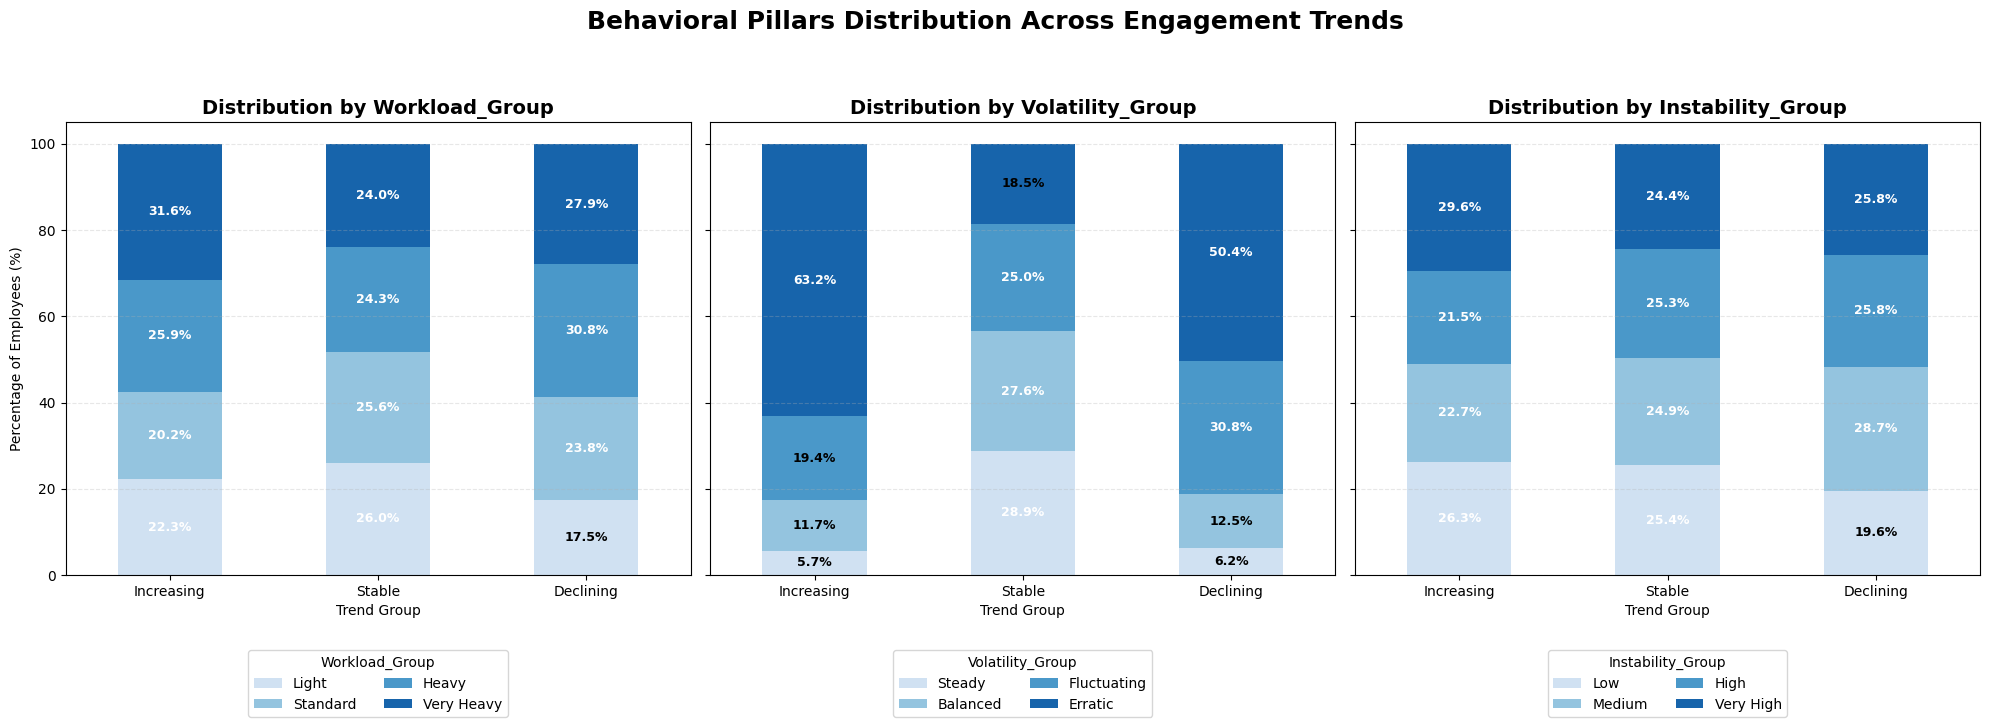

In [70]:
#Use a function to display plots
def plot_behavioral_pillars_cross_trend(df_mapping, colors_palette="Blues"):
    #Configuration: Define pillars and the logical order of trends
    pillars = ['Workload_Group', 'Volatility_Group', 'Instability_Group']
    trend_order = ['Increasing', 'Stable', 'Declining']
    
    #Initialize the figure with 3 subplots sharing the Y axis
    fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)
    colors = sns.color_palette(colors_palette, 4)

    for i, pillar in enumerate(pillars):
        #Data Processing: Create a contingency table normalized by row (Trend_Group)
        #This converts raw counts into percentages relative to the trend group
        crosstab = pd.crosstab(df_mapping['Trend_Group'], df_mapping[pillar], normalize='index') * 100
        
        #Ensure categories follow the logical 'Increasing -> Stable -> Declining' order
        crosstab = crosstab.reindex(trend_order)
        
        #Plotting: Create the stacked bar chart
        crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=colors, legend=False)
        
        #Data Annotation: Overlay percentage labels on each bar segment
        for n, x in enumerate([*crosstab.index.values]):
            cumulative_height = 0
            for col in crosstab.columns:
                value = crosstab.loc[x, col]
                #Only display labels for significant segments (>5%) to avoid clutter
                if value > 5: 
                    axes[i].text(
                        n, 
                        cumulative_height + (value / 2), 
                        f'{value:.1f}%', 
                        va='center', 
                        ha='center', 
                        color='white' if value > 20 else 'black', # Adaptive contrast
                        fontweight='bold', 
                        fontsize=9
                    )
                cumulative_height += value

        #Formatting: Individual subplot adjustments
        axes[i].set_title(f'Distribution by {pillar}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel('Trend Group')
        axes[i].set_xticklabels(trend_order, rotation=0)
        axes[i].grid(axis='y', linestyle='--', alpha=0.3)
        
        #Place legend below each specific chart for clarity
        axes[i].legend(title=pillar, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

    #Global labels and layout
    axes[0].set_ylabel('Percentage of Employees (%)')
    plt.suptitle('Behavioral Pillars Distribution Across Engagement Trends', fontsize=18, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()

plot_behavioral_pillars_cross_trend(df_mapping)

The data shows that sustainable performance is not just about growth or high effort. The increasing trend group may look positive at first, but it is also the most unstable. Engagement grows in spikes, driven by high weekly volatility and heavy workloads, which puts this group under constant pressure. This type of growth is difficult to sustain and carries a hidden risk of burnout.

The declining trend highlights how disengagement usually starts. Rather than stopping abruptly, employees first lose rhythm. This group shows rising volatility and growing schedule instability, moving away from normal workload patterns. Disengagement appears as irregular presence before it becomes a complete withdrawal from tasks.

In contrast, the stable trend stands out as the most reliable group. With more steady profiles and balanced workloads, it demonstrates that consistency matters more than intensity. Low volatility and regular weekly engagement are the strongest indicators of long-term performance and retention.

## 1.5-Summary - Notebook 1

| Step / Factor               | Main Finding                                  | Notes / Insights                                                                 |
|------------------------------|-----------------------------------------------|---------------------------------------------------------------------------------|
| Data Integrity & Temporal Consistency | No negative or extreme WorkHours; all timestamps valid | Hidden duplicates removed; Full-year coverage for all employees; no permanent drop-outs; In/Out times reliable for duration calculation |
| Shift Structure              | Single daytime shift confirmed               | Latest arrival 11:20 AM; safe to assume standard day schedule for all metrics   |
| Daily Feature Engineering    | Attendance and work metrics created         | WorkHours, Arrival/DepartureHour, Absent, ShortDay, LongDay, Overtime, Deficit capture behavioral primitives |
| Weekly Aggregation           | Calendar-normalized engagement               | WeeklyWorkHours, WeeklyEngagementScore, WeeklyHoursVsPeerAvg adjust for business days and peer norms |
| Schedule Stability           | Arrival variability quantified               | WeeklyArrivalStd captures regularity; most employees are stable, schedule irregularity shows limited predictive power |
| Monthly Aggregation          | Long-term trends measurable                  | MonthlyDailyAvg and MonthlyVsPeerAvg detect persistent under- or over-engagement patterns |
| Univariate Analysis          | Clear behavioral norms                        | WeeklyAvgWorkHours centered ~7.7h; ShortDays skewed to disengaged subgroup; LongDays rare overall but highly concentrated in the Very Heavy workload group |
| Bivariate & Seasonal Patterns| Stable weekday and monthly ratios            | Absence / ShortDay / LongDay ~60/30/10 consistently; no Friday effect; seasonal volume variation, proportional stability |
| Multivariate Behavioral Groups | Workload, Instability, Volatility, Trend    | Quartile-based grouping identifies Light → Very Heavy, Low → Very High Instability, Steady → Erratic Volatility, Increasing/Stable/Declining Trends |
| Predictive Insights          | Volatility & Trend strongest signals         | High engagement volatility and declining weekly trends strongly predict absenteeism; workload shows an inverse relationship with absences, likely reflecting disengagement at low levels and presenteeism at very high levels; schedule instability weak predictor |

**The EDA reveals distinct behavioral patterns across workload, volatility, and engagement trends, suggesting that clustering is likely to uncover multiple employee archetypes.**

## 1.6-Data Export

In [71]:
import pickle

#Merge behavioral pillars with daily metrics
df_daily = pd.merge(df_events, 
                    df_workload[['EmployeeID', 'Workload_Group']], 
                    on='EmployeeID')
df_daily = pd.merge(df_daily, 
                    df_instability[['EmployeeID', 'Instability_Group']], 
                    on='EmployeeID')
df_daily = pd.merge(df_daily, 
                    df_volatility[['EmployeeID', 'Volatility_Group']], 
                    on='EmployeeID')
df_daily = pd.merge(df_daily, 
                    df_trend[['EmployeeID', 'Trend_Group']], 
                    on='EmployeeID')

#Aggregate weekly and monthly metrics for merging
df_weekly_agg = df_weekly.copy()  
df_monthly_agg = df_monthly.copy() 

#Merge all levels into one central dataframe
#Start from daily level
df_central = df_daily.copy()

#Merge weekly metrics
df_central = pd.merge(
    df_central,
    df_weekly_agg,
    on=['EmployeeID', 'Week'],
    how='left',
    suffixes=('', '_weekly')
)

#Merge monthly metrics
df_central = pd.merge(
    df_central,
    df_monthly_agg,
    on=['EmployeeID', 'Month'],
    how='left',
    suffixes=('', '_monthly')
)

#Save the dataset as a pickle
export_filename = "centralized_employee_dataset.pkl"

with open(export_filename, "wb") as f:
    pickle.dump(df_central, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"--- Export Successful: {export_filename} ---")
print(f"Central dataset shape: {df_central.shape}")

--- Export Successful: centralized_employee_dataset.pkl ---
Central dataset shape: (719112, 43)
